In [12]:
# make an in-sample forecast
import fbprophet
import matplotlib
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

In [2]:
# load data
df = read_csv('Data\international-airline-passengers.csv') 

In [3]:
# summarize shape
print(df.shape)
# show first few rows
print(df.tail())

(144, 2)
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


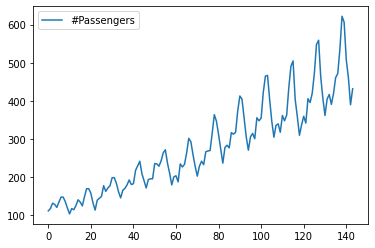

In [4]:
# plot the time series
df.plot()
pyplot.show()

In [5]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [6]:
# define the model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
C:\Users\abhui\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


          ds        yhat  yhat_lower  yhat_upper
0 1960-01-01  430.999301  404.981832  461.457983
1 1960-02-01  417.074318  386.858633  443.338534
2 1960-03-01  451.438831  422.200421  476.980417
3 1960-04-01  460.485085  432.350628  489.040897
4 1960-05-01  457.331381  428.386528  485.206780


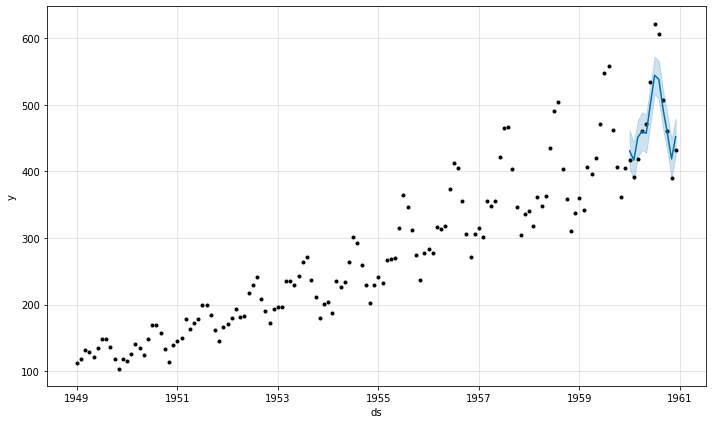

In [7]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1960-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

          ds        yhat  yhat_lower  yhat_upper
0 1961-01-01  464.572929  434.959897  491.674670
1 1961-02-01  462.145477  433.118985  490.585210
2 1961-03-01  494.903423  466.945085  522.817282
3 1961-04-01  492.673643  464.967285  520.884069
4 1961-05-01  494.221309  466.168579  522.242855


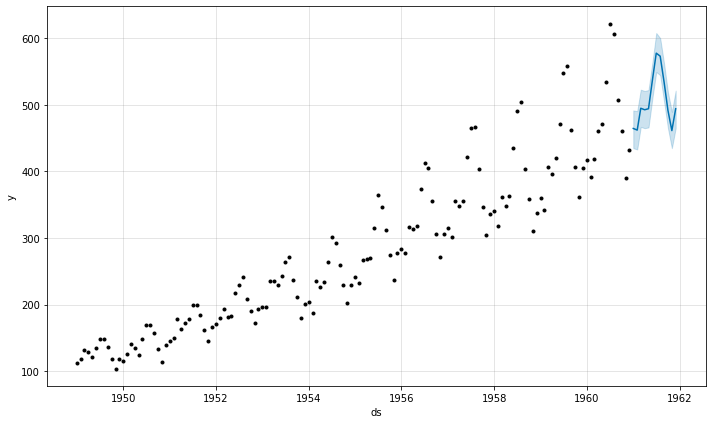

In [8]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1961-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [9]:
#Simulate the same dataset with train and test split
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
# fit the model
model.fit(train)

            ds    y
127 1959-08-01  559
128 1959-09-01  463
129 1959-10-01  407
130 1959-11-01  362
131 1959-12-01  405


C:\Users\abhui\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


MAE: 33.343


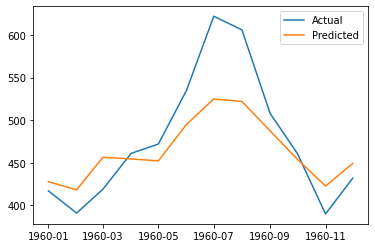

In [13]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1960-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(future['ds'], y_true, label='Actual')
pyplot.plot(future['ds'], y_pred, label='Predicted')
pyplot.legend()
pyplot.show()